In [401]:
import numpy as np
value = 1 / (1 + np.exp(-0.5))
print(value)


0.6224593312018546


In [402]:
data = np.array((
    (1, 1, 1),
    (0, 0, 0),
    (0, 1, 0),
    (1, 0, 0),
    (1, 0.1, 0)
))

X_train = data[:-1, :-1]
X_test = data[-1:, :-1]

Y_train = data[:-1, -1]
Y_test = data[-1:, -1]

print(X_train.shape)
print(X_test.shape)

(4, 2)
(1, 2)


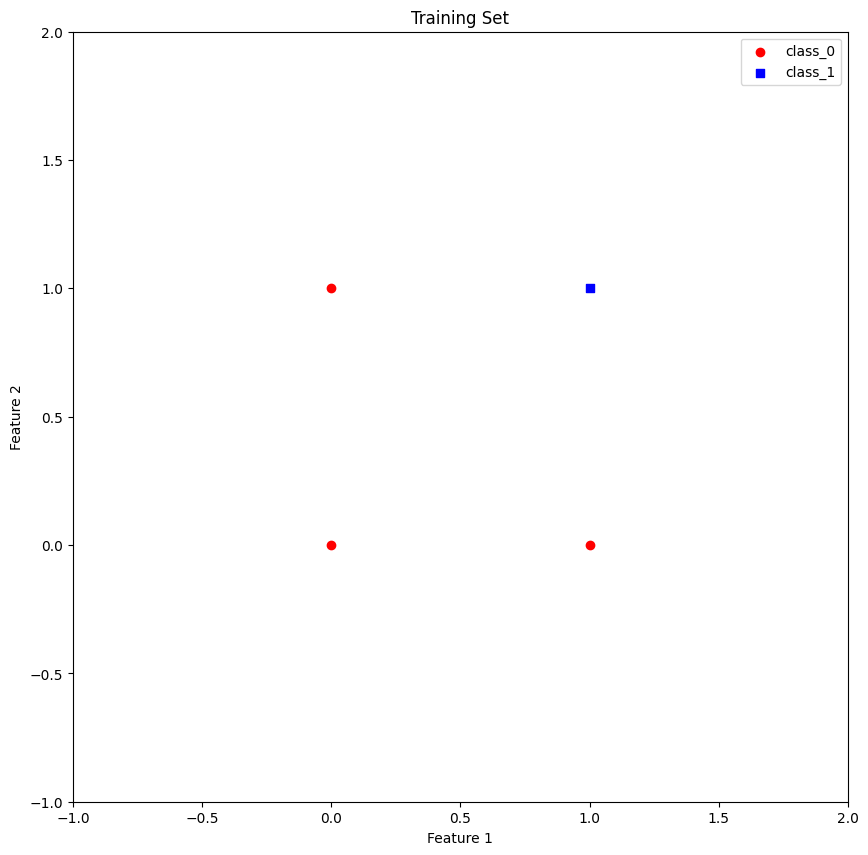

In [403]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(X_train[Y_train == 0, 0], X_train[Y_train == 0, 1], label='class_0', marker='o', color='r')
plt.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], label='class_1', marker='s', color='b')
plt.title("Training Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim([-1, 2])
plt.ylim([-1, 2])
plt.legend()
plt.show()

In [404]:
print(X_train[0].reshape(1, 2))

[[1. 1.]]


In [405]:
print(X_train[0].reshape(2, 1))

[[1.]
 [1.]]


In [406]:
class Perceptron():
  def __init__(self, num_features):
    self.num_features = num_features
    self.weights = np.zeros((num_features, 1), dtype=np.float32)
    self.bias = np.zeros(1, dtype=np.float32)

  def forward(self, x):
    z = np.dot(x, self.weights) + self.bias*1  # Z
    # print("Weight :", linear)
    y = 1/(1+np.exp(-z))
    # predictions = np.where(y > 0.5, 1, 0)
    return y

  def predict(self, x):
    y = self.forward(x)
    predictions = np.where(y > 0.5, 1, 0)
    return predictions

  def backward(self, x, y):
    predictions = self.forward(x)
    errors = y - predictions
    return errors

  def evaluate(self, x, y):
    predictions = self.predict(x).reshape(-1)
    accuracy = np.sum(predictions == y) / y.shape[0]
    return accuracy

  def train(self, x: np.array, y: np.array, epoch):
    for e in range(epoch):
      for i in range(y.shape[0]):
        xi = x[i].reshape(1, self.num_features)
        yi = y[i].reshape(-1)
        errors = self.backward(xi, yi)
        self.bias += errors.reshape(-1)
        self.weights += (errors*x[i].reshape(self.num_features, 1))

In [407]:
ppn = Perceptron(num_features=2)
ppn.train(X_train, Y_train, epoch=6)

In [408]:
#         weight0     weight1       bias
# Excel (1 EPOCH) : 0.053726561	-0.093279805	-1.162012576

print(ppn.bias)
print(ppn.weights)

[-2.8728278]
[[1.5536311]
 [1.2211826]]


In [409]:
results = ppn.predict(X_test)
print("True :", Y_test)
print("Predictions :", results)

True : [0.]
Predictions : [[0]]


In [410]:
results = ppn.evaluate(X_train, Y_train)
print(f"Evaluate : {results*100:.2f}%")

Evaluate : 75.00%


In [411]:
results = ppn.evaluate(X_test, Y_test)
print(f"Evaluate : {results*100:.2f}%")

Evaluate : 100.00%


## Work

In [412]:
# # txt to csv
# with open('dataset/perceptron_toydata.txt', 'r') as f:
#   lines = f.readlines()
#   new_lines = [line.split("\t") for line in lines]
#   with open('dataset/perceptron_toydata.csv', 'w') as new_f:
#     new_f.write("x1,x2,class\n")
#     for line in new_lines:
#       new_f.write(','.join(line))

# import pandas as pd
# data = pd.read_csv('dataset/perceptron_toydata.csv')
# data.head()

In [413]:
import numpy as np
data = np.genfromtxt('dataset/perceptron_toydata.txt', delimiter='\t')
data

array([[ 0.77, -1.14,  0.  ],
       [-0.33,  1.44,  0.  ],
       [ 0.91, -3.07,  0.  ],
       [-0.37, -1.91,  0.  ],
       [-1.84, -1.13,  0.  ],
       [-1.5 ,  0.34,  0.  ],
       [-0.63, -1.53,  0.  ],
       [-1.08, -1.23,  0.  ],
       [ 0.39, -1.99,  0.  ],
       [-1.26, -2.9 ,  0.  ],
       [-5.27, -0.78,  0.  ],
       [-0.49, -2.74,  0.  ],
       [ 1.48, -3.74,  0.  ],
       [-1.64, -1.96,  0.  ],
       [ 0.45,  0.36,  0.  ],
       [-1.48, -1.17,  0.  ],
       [-2.94, -4.47,  0.  ],
       [-2.19, -1.48,  0.  ],
       [ 0.02, -0.02,  0.  ],
       [-2.24, -2.12,  0.  ],
       [-3.17, -3.69,  0.  ],
       [-4.09,  1.03,  0.  ],
       [-2.41, -2.31,  0.  ],
       [-3.45, -0.61,  0.  ],
       [-3.96, -2.  ,  0.  ],
       [-2.95, -1.16,  0.  ],
       [-2.42, -3.35,  0.  ],
       [-1.74, -1.1 ,  0.  ],
       [-1.61, -1.28,  0.  ],
       [-2.59, -2.21,  0.  ],
       [-2.64, -2.2 ,  0.  ],
       [-2.84, -4.12,  0.  ],
       [-1.45, -2.26,  0.  ],
       [-3

In [414]:
results = {
    0.2: {},
    0.3: {},
    0.4: {}
}

In [415]:
# Preparing Data by Holdout Method
from sklearn.model_selection import train_test_split

Xdata = data[:, :-1]
ydata = data[:, -1]

cases = [0.2, 0.3, 0.4]

for test_size in cases:
  X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=test_size, random_state=42)
  print(f"Training data shape: X:{X_train.shape}   y:{y_train.shape}")
  print(f"Testing data shape: X:{X_test.shape}   y:{y_test.shape}")

  ppn = Perceptron(num_features=2)
  ppn.train(X_train, y_train, epoch=50)
  accurency_train = ppn.evaluate(X_train, y_train)
  accurency_test = ppn.evaluate(X_test, y_test)
  print(f"\nTest size {test_size}, 50 epochs:")
  print(f"Training accuracy: {accurency_train*100:.2f}%")
  print(f"Testing accuracy: {accurency_test*100:.2f}%")
  results[test_size]["50 EPOCH"] = {
      "Weights": ppn.weights,
      "Bias": ppn.bias,
      "Accurency_train": accurency_train,
      "Accurency_test": accurency_test
  }

  ppn = Perceptron(num_features=2)
  ppn.train(X_train, y_train, epoch=100)
  accurency_train = ppn.evaluate(X_train, y_train)
  accurency_test = ppn.evaluate(X_test, y_test)
  print(f"\nTest size {test_size}, 100 epochs:")
  print(f"Training accuracy: {accurency_train*100:.2f}%")
  print(f"Testing accuracy: {accurency_test*100:.2f}%")
  results[test_size]["100 EPOCH"] = {
      "Weights": ppn.weights,
      "Bias": ppn.bias,
      "Accurency_train": accurency_train,
      "Accurency_test": accurency_test
  }

  ppn = Perceptron(num_features=2)
  ppn.train(X_train, y_train, epoch=150)
  accurency_train = ppn.evaluate(X_train, y_train)
  accurency_test = ppn.evaluate(X_test, y_test)
  print(f"\nTest size {test_size}, 150 epochs:")
  print(f"Training accuracy: {accurency_train*100:.2f}%")
  print(f"Testing accuracy: {accurency_test*100:.2f}%")
  results[test_size]["150 EPOCH"] = {
      "Weights": ppn.weights,
      "Bias": ppn.bias,
      "Accurency_train": accurency_train,
      "Accurency_test": accurency_test
  }

Training data shape: X:(80, 2)   y:(80,)
Testing data shape: X:(20, 2)   y:(20,)

Test size 0.2, 50 epochs:
Training accuracy: 100.00%
Testing accuracy: 100.00%

Test size 0.2, 100 epochs:
Training accuracy: 100.00%
Testing accuracy: 100.00%

Test size 0.2, 150 epochs:
Training accuracy: 100.00%
Testing accuracy: 100.00%
Training data shape: X:(70, 2)   y:(70,)
Testing data shape: X:(30, 2)   y:(30,)

Test size 0.3, 50 epochs:
Training accuracy: 100.00%
Testing accuracy: 100.00%

Test size 0.3, 100 epochs:
Training accuracy: 100.00%
Testing accuracy: 100.00%

Test size 0.3, 150 epochs:
Training accuracy: 100.00%
Testing accuracy: 100.00%
Training data shape: X:(60, 2)   y:(60,)
Testing data shape: X:(40, 2)   y:(40,)

Test size 0.4, 50 epochs:
Training accuracy: 100.00%
Testing accuracy: 100.00%

Test size 0.4, 100 epochs:
Training accuracy: 100.00%
Testing accuracy: 100.00%

Test size 0.4, 150 epochs:
Training accuracy: 100.00%
Testing accuracy: 100.00%


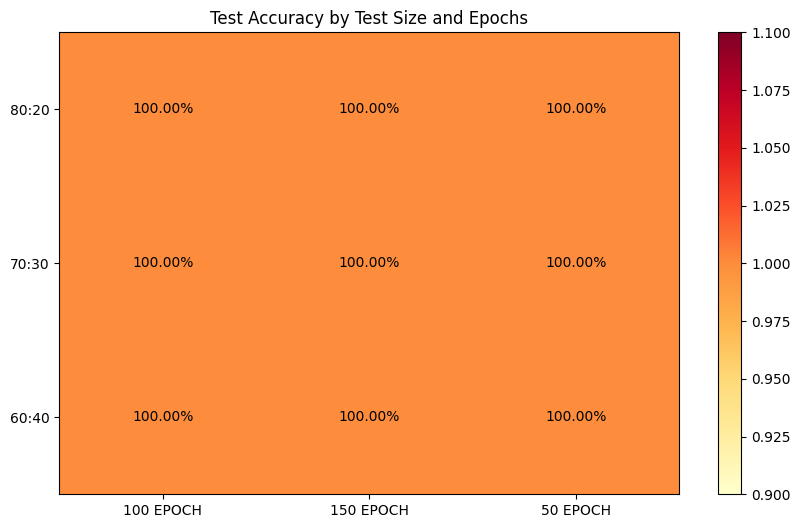

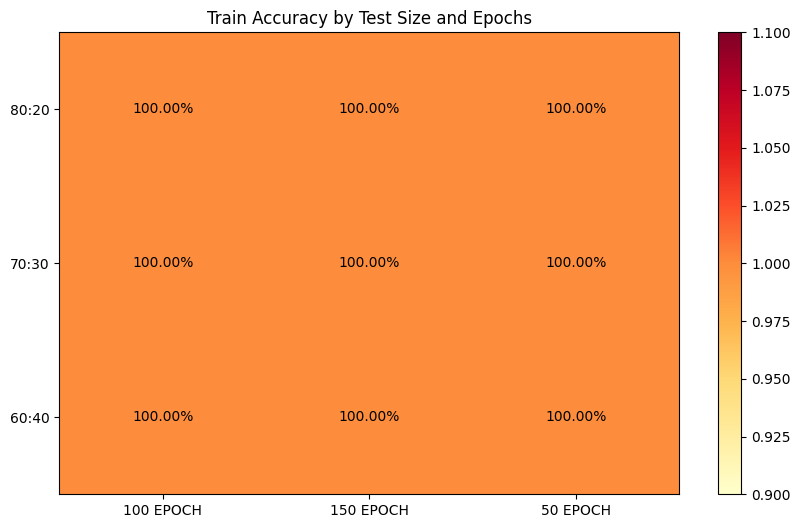

In [416]:
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrames to store results
df_results_test = []
df_results_train = []
for test_size in results:
  for epoch in results[test_size]:
    df_results_test.append({
        'Test Size': test_size,
        'Epoch': epoch,
        'Accuracy': results[test_size][epoch]['Accurency_test']
    })
    df_results_train.append({
        'Test Size': test_size,
        'Epoch': epoch,
        'Accuracy': results[test_size][epoch]['Accurency_train']
    })
df_results_test = pd.DataFrame(df_results_test)
df_results_train = pd.DataFrame(df_results_train)

# Create test accuracy heatmap
plt.figure(figsize=(10, 6))
df_pivot_test = df_results_test.pivot(index='Test Size', columns='Epoch', values='Accuracy')
plt.imshow(df_pivot_test, cmap='YlOrRd', aspect='auto')
plt.colorbar()
plt.xticks(range(len(df_pivot_test.columns)), df_pivot_test.columns)
plt.yticks(range(len(df_pivot_test.index)), [f'{int((1-x)*100)}:{int(x*100)}' for x in df_pivot_test.index])
for i in range(len(df_pivot_test.index)):
  for j in range(len(df_pivot_test.columns)):
    plt.text(j, i, f'{df_pivot_test.iloc[i, j]*100:.2f}%',
             ha='center', va='center')
plt.title('Test Accuracy by Test Size and Epochs')
plt.show()

# Create train accuracy heatmap
plt.figure(figsize=(10, 6))
df_pivot_train = df_results_train.pivot(index='Test Size', columns='Epoch', values='Accuracy')
plt.imshow(df_pivot_train, cmap='YlOrRd', aspect='auto')
plt.colorbar()
plt.xticks(range(len(df_pivot_train.columns)), df_pivot_train.columns)
plt.yticks(range(len(df_pivot_train.index)), [f'{int((1-x)*100)}:{int(x*100)}' for x in df_pivot_train.index])
for i in range(len(df_pivot_train.index)):
  for j in range(len(df_pivot_train.columns)):
    plt.text(j, i, f'{df_pivot_train.iloc[i, j]*100:.2f}%',
             ha='center', va='center')
plt.title('Train Accuracy by Test Size and Epochs')
plt.show()

# # Create line plot
# plt.figure(figsize=(10, 6))
# for test_size in cases:
#   test_accuracies = [results[test_size][f'{e} EPOCH']['Accurency_test'] for e in [50, 100, 150]]
#   train_accuracies = [results[test_size][f'{e} EPOCH']['Accurency_train'] for e in [50, 100, 150]]
#   plt.plot([50, 100, 150], test_accuracies, marker='o', label=f'Test Size {test_size} (Test)')
#   plt.plot([50, 100, 150], train_accuracies, marker='s', linestyle='--', label=f'Test Size {test_size} (Train)')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Train and Test Accuracy vs Epochs for Different Test Sizes')
# plt.legend()
# plt.grid(True)
# plt.show()


Training with 50 epochs:
Fold 1 test accuracy: 100.00%
Fold 1 train accuracy: 100.00%
Fold 2 test accuracy: 100.00%
Fold 2 train accuracy: 100.00%
Fold 3 test accuracy: 100.00%
Fold 3 train accuracy: 100.00%
Fold 4 test accuracy: 100.00%
Fold 4 train accuracy: 100.00%
Fold 5 test accuracy: 100.00%
Fold 5 train accuracy: 100.00%
Fold 6 test accuracy: 100.00%
Fold 6 train accuracy: 100.00%
Fold 7 test accuracy: 100.00%
Fold 7 train accuracy: 100.00%
Fold 8 test accuracy: 100.00%
Fold 8 train accuracy: 100.00%
Fold 9 test accuracy: 100.00%
Fold 9 train accuracy: 100.00%
Fold 10 test accuracy: 100.00%
Fold 10 train accuracy: 100.00%
Average test accuracy for 50 epochs: 100.00%
Average train accuracy for 50 epochs: 100.00%

Training with 100 epochs:
Fold 1 test accuracy: 100.00%
Fold 1 train accuracy: 100.00%
Fold 2 test accuracy: 100.00%
Fold 2 train accuracy: 100.00%
Fold 3 test accuracy: 100.00%
Fold 3 train accuracy: 100.00%
Fold 4 test accuracy: 100.00%
Fold 4 train accuracy: 100.00%


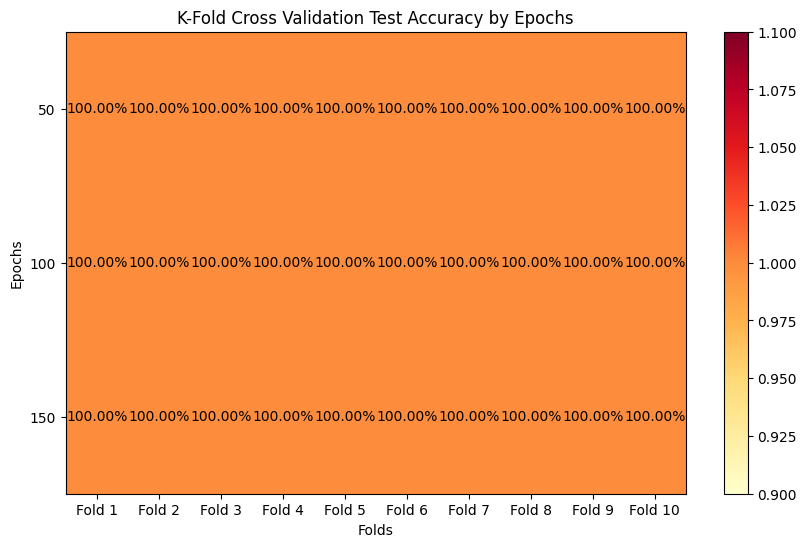

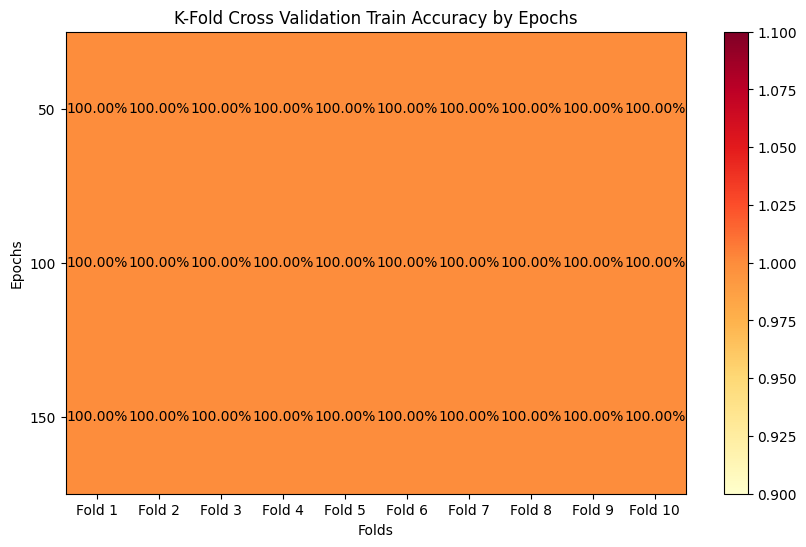

In [417]:
# Preparing Data by K-Fold Cross Validation
from sklearn.model_selection import KFold
import numpy as np

k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
epochs = [50, 100, 150]

# Store results for heatmap
results_dict_test = {epoch: [] for epoch in epochs}
results_dict_train = {epoch: [] for epoch in epochs}

for n_epochs in epochs:
  fold_accuracies_test = []
  fold_accuracies_train = []
  print(f"\nTraining with {n_epochs} epochs:")

  for fold, (train_index, test_index) in enumerate(k_fold.split(Xdata)):
    X_train, X_test = Xdata[train_index], Xdata[test_index]
    y_train, y_test = ydata[train_index], ydata[test_index]

    ppn = Perceptron(num_features=2)
    ppn.train(X_train, y_train, epoch=n_epochs)

    accuracy_test = ppn.evaluate(X_test, y_test)
    accuracy_train = ppn.evaluate(X_train, y_train)

    fold_accuracies_test.append(accuracy_test)
    fold_accuracies_train.append(accuracy_train)
    results_dict_test[n_epochs].append(accuracy_test)
    results_dict_train[n_epochs].append(accuracy_train)

    print(f"Fold {fold+1} test accuracy: {accuracy_test*100:.2f}%")
    print(f"Fold {fold+1} train accuracy: {accuracy_train*100:.2f}%")

  mean_accuracy_test = sum(fold_accuracies_test) / len(fold_accuracies_test)
  mean_accuracy_train = sum(fold_accuracies_train) / len(fold_accuracies_train)
  print(f"Average test accuracy for {n_epochs} epochs: {mean_accuracy_test*100:.2f}%")
  print(f"Average train accuracy for {n_epochs} epochs: {mean_accuracy_train*100:.2f}%")

# Create test accuracy heatmap
plt.figure(figsize=(10, 6))
data_test = np.array([results_dict_test[epoch] for epoch in epochs])
plt.imshow(data_test, cmap='YlOrRd', aspect='auto')
plt.colorbar()
plt.xticks(range(10), [f'Fold {i+1}' for i in range(10)])
plt.yticks(range(3), epochs)
plt.xlabel('Folds')
plt.ylabel('Epochs')

# Add text annotations
for i in range(len(epochs)):
  for j in range(10):
    plt.text(j, i, f'{data_test[i,j]*100:.2f}%',
             ha='center', va='center')

plt.title('K-Fold Cross Validation Test Accuracy by Epochs')
plt.show()

# Create train accuracy heatmap
plt.figure(figsize=(10, 6))
data_train = np.array([results_dict_train[epoch] for epoch in epochs])
plt.imshow(data_train, cmap='YlOrRd', aspect='auto')
plt.colorbar()
plt.xticks(range(10), [f'Fold {i+1}' for i in range(10)])
plt.yticks(range(3), epochs)
plt.xlabel('Folds')
plt.ylabel('Epochs')

# Add text annotations
for i in range(len(epochs)):
  for j in range(10):
    plt.text(j, i, f'{data_train[i,j]*100:.2f}%',
             ha='center', va='center')

plt.title('K-Fold Cross Validation Train Accuracy by Epochs')
plt.show()